# Data Visualization

In [2]:
using Plots

There are several plotting packages for Julia, including [Gadfly](http://gadflyjl.org/stable/) which implements the grammar of graphics and integrates tightly with dataframes, and [Makie](https://makie.juliaplots.org/stable/) which is verbose but allows very advanced plots to be created. However, a very quick and intuitive package for plotting is [Plots](https://docs.juliaplots.org/latest/), which we will focus on here.

Before we start plotting, we need to define some example data:

In [1]:
globaltemperatures = [14.4, 14.5, 14.8, 15.2, 15.5, 15.8]
numpirates = [45000, 20000, 15000, 5000, 400, 17]

6-element Vector{Int64}:
 45000
 20000
 15000
  5000
   400
    17

## Backends
Backends are the engines that render a plot based on the provided code. Three of the most prominent backends for data viz in Julia are:
* `GR` : a fast and flexible backend with limited interactivity
* `Plotly` : an interactive backend that comes with the overhead of running on JavaScript
* `Unicode` : a backend for rendering plots directly into the terminal

One of the advantages of using `Plots` for data visualization is that exactly the same code can be passed to different backends. This means that you can make a static plot for publication, an interactive plot for data exploration, and a unicode plot for logging without having to switch between 3 different plotting libraries.

A backend is specified by calling the backend name. This sets a global variable for the backend to use

In [3]:
gr()

Plots.GRBackend()

## Basic Plotting
The basic procedure for plotting is as follows:
1. Specify the data and plot type with the `plot()` function. If the `gr` or `plotly` backends are specified, this displays an initial plot in a separate window or the notebook
2. Add elements to the plot using various commands appended with `!` to change the existing plot in-place
3. Save the figure to file with `savefig()`

The `plot()` function takes two arguments at minimum, the variables holding the data to be plotted

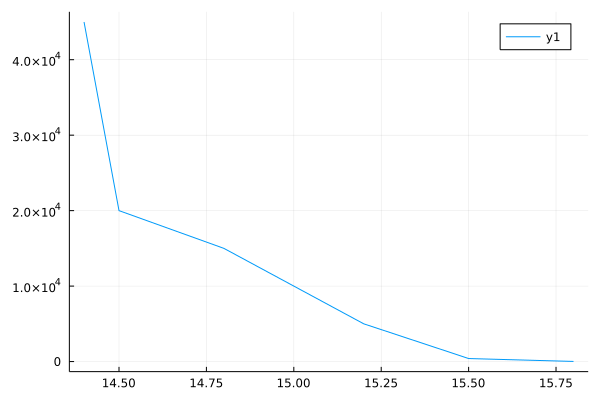

In [4]:
plot(globaltemperatures, numpirates)

We can also specify the label in the legend with the `label` argument. Notice that if we don't put a `!` at the end of the `plots()` call, it will replace the existing plot with a new one

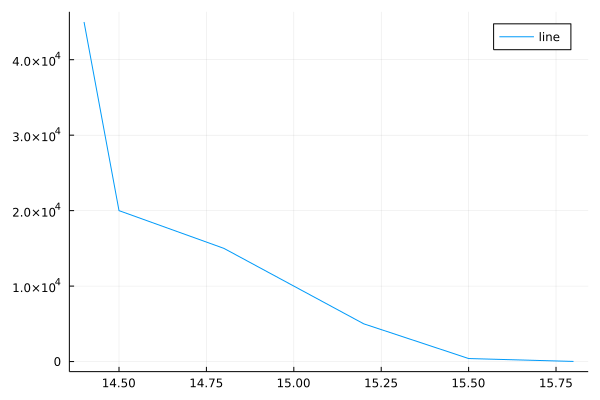

In [8]:
plot(globaltemperatures, numpirates, label="line")

Now we can start adding elements to this existing plot, by calling commands with the `!` operator at the end to specify mutating mode (i.e. in-place changes). First let's add another layer to show the individual points

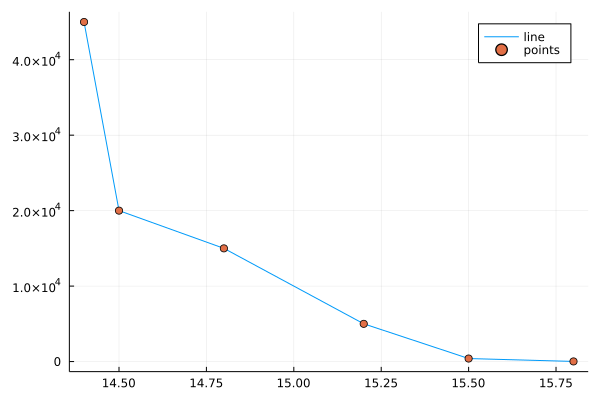

In [9]:
scatter!(globaltemperatures, numpirates, label="points")

Now we add some axis labels and a title

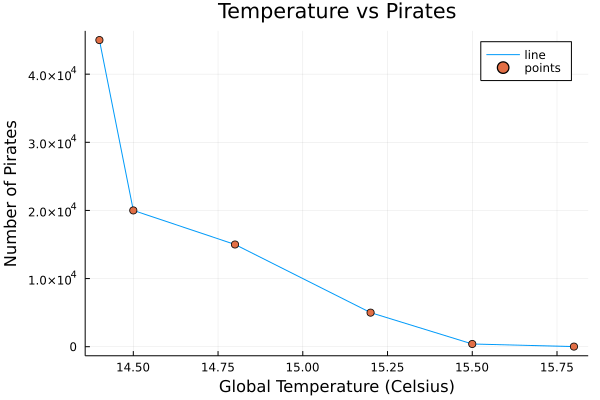

In [10]:
title!("Temperature vs Pirates")
xlabel!("Global Temperature (Celsius)")
ylabel!("Number of Pirates")

## Interactive Plots
We can easily change a plot from static to interactive by using the `plotly` backend. Once we have changed the backend, we can use exactly the same code as above

In [12]:
plotlyjs()
plot(globaltemperatures, numpirates, label="line")
scatter!(globaltemperatures, numpirates, label="points")
title!("Temperature vs Pirates")
xlabel!("Global Temperature (Celsius)")
ylabel!("Number of Pirates")

┌ Info: Precompiling PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a]
└ @ Base loading.jl:1423
┌ Warning: Module DocStringExtensions with build ID 9698356218126 is missing from the cache.
│ This may mean DocStringExtensions [ffbed154-4ef7-542d-bbb7-c09d3a79fcae] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Warning: Module DocStringExtensions with build ID 9698356218126 is missing from the cache.
│ This may mean DocStringExtensions [ffbed154-4ef7-542d-bbb7-c09d3a79fcae] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Info: Skipping precompilation since __precompile__(false). Importing PlotlyJS [f0f68f2c-4968-5e81-91da-67840de0976a].
└ @ Base loading.jl:1124
┌ Info: Precompiling PlotlyBase [a03496cd-edff-5a9b-9e67-9cda94a718b5]
└ @ Base loading.jl:1423
┌ Warning: Module DocStringExtensions with build ID 9698356218126 is missing from the cache.
│ This may mean DocStringExtensions [ffbed15

WebIO._IJuliaInit()

┌ Info: Precompiling Blink [ad839575-38b3-5650-b840-f874b8c74a25]
└ @ Base loading.jl:1423
┌ Warning: Module MbedTLS with build ID 2875032634251 is missing from the cache.
│ This may mean MbedTLS [739be429-bea8-5141-9913-cc70e7f3736d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Warning: Module MbedTLS with build ID 2875032634251 is missing from the cache.
│ This may mean MbedTLS [739be429-bea8-5141-9913-cc70e7f3736d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Warning: Module MbedTLS with build ID 2875032634251 is missing from the cache.
│ This may mean MbedTLS [739be429-bea8-5141-9913-cc70e7f3736d] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1107
┌ Warning: Module MbedTLS with build ID 2875032634251 is missing from the cache.
│ This may mean MbedTLS [739be429-bea8-5141-9913-cc70e7f3736d] does not support precompilation but is import

## Panelled Plots
To create plots with multiple panels, we just specify each plot individually, and the call the `plot()` function again on all of the plots that we want to include, with additional options to determine the layout

In [20]:
x = 1:0.1:4 # specifying a range of values from 1 to 4 at 0.1 increments
p1 = plot(x, x)
p2 = plot(x, x.^2)
p3 = plot(x, x.^3)
p4 = plot(x, x.^4)
plot(p1, p2, p3, p4, layout=(2,2), legend=false)